In [64]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time

In [65]:
# graph_file = './hw3dataset/ibm-5000/ibm-5000f.txt'
# graph_result = './results/ibm-5000/ibm-5000_PageRank.txt'
graph_file = '../hw3dataset/graph_6.txt'
graph_result = '../results/graph_6/graph_6_PageRank.txt'
f = open(graph_file,'r')
input = []
for line in f.readlines():
    s = line.split('\n')[0]
    s = s.split(',')
    s = tuple(s)
    input.append(s)
f.close

<function TextIOWrapper.close()>

In [66]:
G = nx.DiGraph()
G.add_edges_from(input)
print("節點個數: ",G.number_of_nodes())
print("邊的個數: ",G.number_of_edges())

節點個數:  1228
邊的個數:  5220


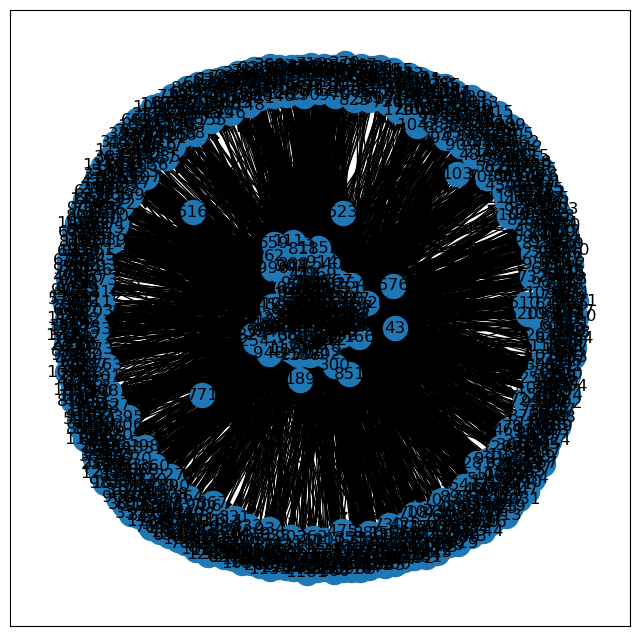

In [67]:
plt.figure(figsize =(8, 8))
nx.draw_networkx(G, with_labels = True)
plt.show()

In [68]:
def PageRank(graph, iter, damping):
    n = graph.number_of_nodes() # 計算圖中的點的個數
    d_frac = damping / n
    rank = dict.fromkeys(graph, 1.0 / n) # 每個節點賦值 1/n
    for _ in range(iter):
        lastRank = rank
        for node in rank: # 全部的點跑一次
            rankSum = 0
            for predecessors in graph.predecessors(node): # 找出節點的父親(所有指向自己的節點)
                outdegree = graph.out_degree(predecessors) # 計算該節點的outdegree值
                if outdegree > 0:
                    rankSum += lastRank[predecessors] * (1.0 / outdegree) # 依據公式計算
            rank[node] = d_frac + ((1 - damping) * rankSum) # 依據公式計算
    return rank   

In [69]:
iter = 30 #設定迴圈數
damping_factor = 0.1 #設定參數
start = time.time()
pagerank = PageRank(G, iter, damping_factor)
end = time.time()
print('PageRank 運算時間:',(end-start))

PageRank 運算時間: 0.06577110290527344


In [70]:
keys = []
for key in pagerank:
    keys.append(int(key))
keys = sorted(keys)
for i in range(len(keys)):
    keys[i] = str(keys[i])

In [71]:
file = open(graph_result,"wb")
ans = []
for key in keys:
    ans.append(pagerank[key])
ans = np.array(ans)
print(type(ans))
np.savetxt(file, ans, newline = ' ', fmt='%.03f')
file.close()

<class 'numpy.ndarray'>
